In [1]:
import MyNN
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model

%matplotlib inline

In [2]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)
    
def load_planar_dataset(m=400, N=200):
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
        
    X = X.T
    Y = Y.T

    return X, Y

def load_extra_datasets(N=200):
    noisy_circles = sklearn.datasets.make_circles(n_samples=N, factor=.1, noise=.2)
    noisy_moons = sklearn.datasets.make_moons(n_samples=N, noise=.2)
    blobs = sklearn.datasets.make_blobs(n_samples=N, random_state=5, n_features=2, centers=6)
    gaussian_quantiles = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.5, n_samples=N, n_features=2, n_classes=2, shuffle=True, random_state=None)
    no_structure = np.random.rand(N, 2), np.random.randint(2, size=(200,1))
    
    return noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure

def predict(model, X):
    Z = model.forward(X)
    pred = (Z>0.5)
    return pred

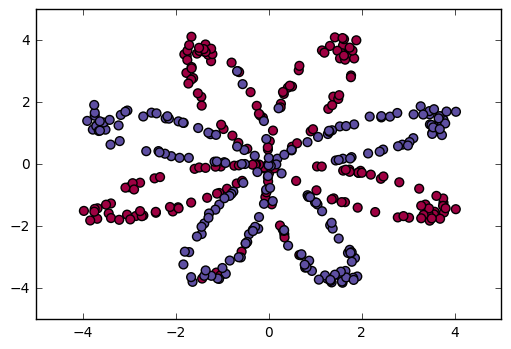

In [3]:
X, Y = load_planar_dataset()
plt.scatter(X[0,:],X[1,:],c=Y,s=40,cmap=plt.cm.Spectral)

In [4]:
nn = MyNN.MyNN(2)
nn.add(4, 'Tanh')
nn.add(1, 'Sigmoid')

In [5]:
print(nn.f_script)
print(nn.b_script)

#Layer 1: Linear of size (4,2) with Tanh activation.
self.co=np.dot(self.body["W1"],self.co)+self.body["b1"]
self.cache["Z1"]=self.co
self.co=np.tanh(self.co)
self.cache["A1"]=self.co
#Layer 2: Linear of size (1,4) with Sigmoid activation.
self.co=np.dot(self.body["W2"],self.co)+self.body["b2"]
self.cache["Z2"]=self.co
self.co=1/(1+np.exp(-self.co))
self.cache["A2"]=self.co

#Layer 2 backprop: Linear of size (1,4) with Sigmoid activation.
self.co=self.cache["A2"]*(1-self.cache["A2"])*self.co
self.grads["db2"]=(1/self.batch_size)*np.sum(self.co, axis=1, keepdims=True)
self.grads["dW2"]=(1/self.batch_size)*np.dot(self.co, self.cache["A1"].T)
self.co=np.dot(self.body["W2"].T,self.co)
#Layer 1 backprop: Linear of size (4,2) with Tanh activation.
self.co=(1-np.power(self.cache["A1"],2))*self.co
self.grads["db1"]=(1/self.batch_size)*np.sum(self.co, axis=1, keepdims=True)
self.grads["dW1"]=(1/self.batch_size)*np.dot(self.co, self.cache["A0"].T)



In [6]:
nn.compile('Cross entropy')

In [7]:
nn.optimize(X, Y, lr=1, num_iterations=10000,report_cost=True, report_cost_freq=1000)

Cost after 0 iterations: 0.6975457668525978
Cost after 1000 iterations: 0.18639478879316643
Cost after 2000 iterations: 0.17175549441106333
Cost after 3000 iterations: 0.16575280722312477
Cost after 4000 iterations: 0.16212338227307632
Cost after 5000 iterations: 0.15960710599600186
Cost after 6000 iterations: 0.15774433227263204
Cost after 7000 iterations: 0.15629554491506922
Cost after 8000 iterations: 0.15512536767108592
Cost after 9000 iterations: 0.15415197978387934
Cost after 10000 iterations: 0.15332309176949793


/home/arsenior/Software/anaconda3/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/arsenior/Software/anaconda3/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


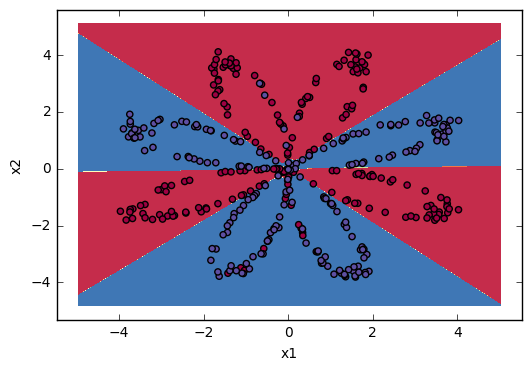

In [8]:
plot_decision_boundary(lambda x: predict(nn, x.T), X, Y)

In [9]:
predictions = predict(nn, X)
print('Accuracy: %d' % float((np.dot(Y, predictions.T) + np.dot(1-Y, 1-predictions.T))/float(Y.size)*100) + '%')

Accuracy: 94%


In [10]:
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()

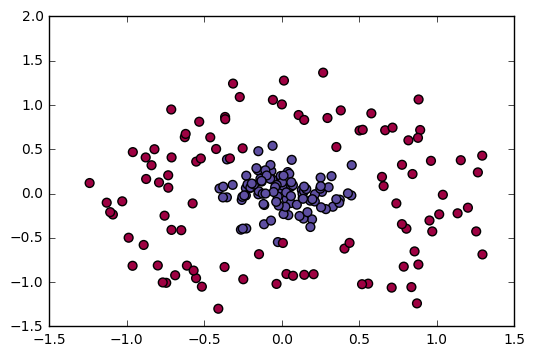

In [11]:
X, Y = noisy_circles
X, Y = X.T, Y.reshape(1, Y.shape[0])
plt.scatter(X[0,:],X[1,:],c=Y,s=40,cmap=plt.cm.Spectral)

/home/arsenior/Software/anaconda3/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/arsenior/Software/anaconda3/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


Accuracy: 99%


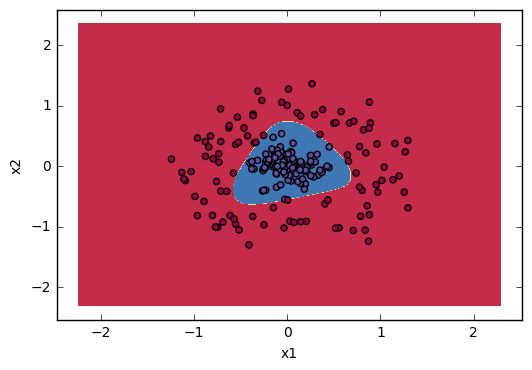

In [12]:
nn = MyNN.MyNN(2)
nn.add(5, 'Tanh')
nn.add(1, 'Sigmoid')
nn.compile('Cross entropy')
nn.optimize(X, Y, lr=1, num_iterations=10000,report_cost=False, report_cost_freq=100)
plot_decision_boundary(lambda x: predict(nn, x.T), X, Y)
predictions = predict(nn, X)
print('Accuracy: %d' % float((np.dot(Y, predictions.T) + np.dot(1-Y, 1-predictions.T))/float(Y.size)*100) + '%')

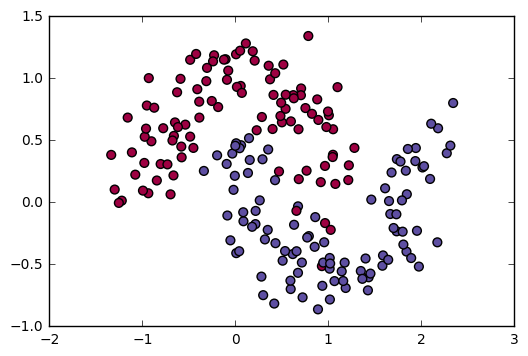

In [13]:
X, Y = noisy_moons
X, Y = X.T, Y.reshape(1, Y.shape[0])
plt.scatter(X[0,:],X[1,:],c=Y,s=40,cmap=plt.cm.Spectral)

/home/arsenior/Software/anaconda3/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/arsenior/Software/anaconda3/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


Accuracy: 97%


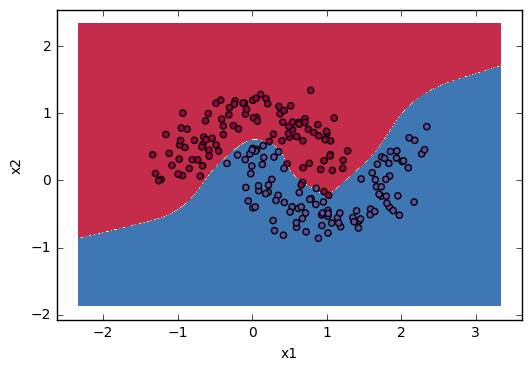

In [14]:
nn = MyNN.MyNN(2)
nn.add(5, 'Tanh')
nn.add(1, 'Sigmoid')
nn.compile('Cross entropy')
nn.optimize(X, Y, lr=1, num_iterations=10000,report_cost=False, report_cost_freq=100)
plot_decision_boundary(lambda x: predict(nn, x.T), X, Y)
predictions = predict(nn, X)
print('Accuracy: %d' % float((np.dot(Y, predictions.T) + np.dot(1-Y, 1-predictions.T))/float(Y.size)*100) + '%')

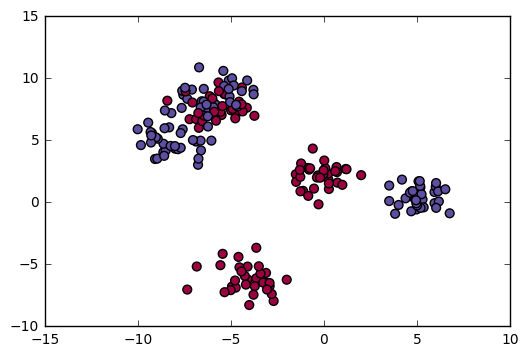

In [15]:
X, Y = blobs
X, Y = X.T, Y.reshape(1, Y.shape[0])%2
plt.scatter(X[0,:],X[1,:],c=Y,s=40,cmap=plt.cm.Spectral)

/home/arsenior/Software/anaconda3/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/arsenior/Software/anaconda3/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


Accuracy: 82%


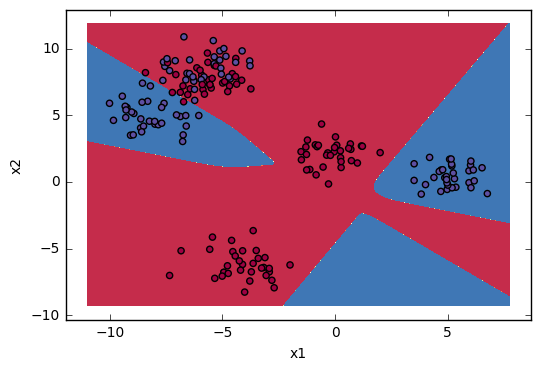

In [16]:
nn = MyNN.MyNN(2)
nn.add(5, 'Tanh')
nn.add(1, 'Sigmoid')
nn.compile('Cross entropy')
nn.optimize(X, Y, lr=1, num_iterations=10000,report_cost=False, report_cost_freq=100)
plot_decision_boundary(lambda x: predict(nn, x.T), X, Y)
predictions = predict(nn, X)
print('Accuracy: %d' % float((np.dot(Y, predictions.T) + np.dot(1-Y, 1-predictions.T))/float(Y.size)*100) + '%')

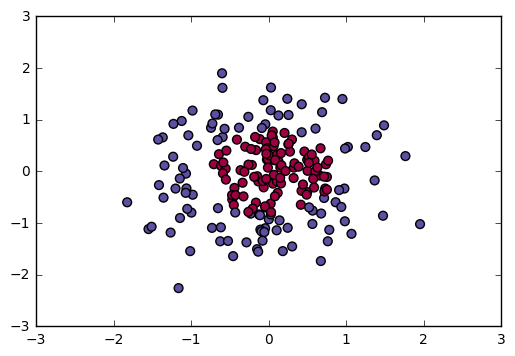

In [17]:
X, Y = gaussian_quantiles
X, Y = X.T, Y.reshape(1, Y.shape[0])
plt.scatter(X[0,:],X[1,:],c=Y,s=40,cmap=plt.cm.Spectral)

/home/arsenior/Software/anaconda3/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/arsenior/Software/anaconda3/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


Accuracy: 100%


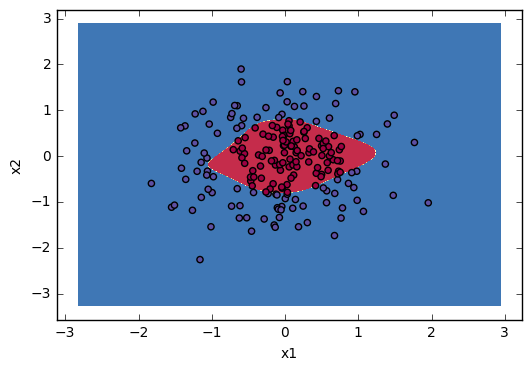

In [18]:
nn = MyNN.MyNN(2)
nn.add(5, 'Tanh')
nn.add(1, 'Sigmoid')
nn.compile('Cross entropy')
nn.optimize(X, Y, lr=1, num_iterations=10000,report_cost=False, report_cost_freq=100)
plot_decision_boundary(lambda x: predict(nn, x.T), X, Y)
predictions = predict(nn, X)
print('Accuracy: %d' % float((np.dot(Y, predictions.T) + np.dot(1-Y, 1-predictions.T))/float(Y.size)*100) + '%')

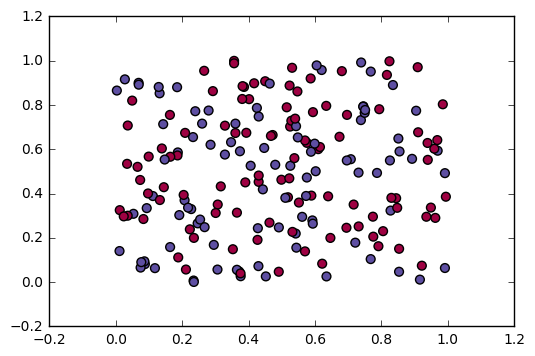

In [19]:
X, Y = no_structure
X, Y = X.T, Y.reshape(1, Y.shape[0])
plt.scatter(X[0,:],X[1,:],c=Y,s=40,cmap=plt.cm.Spectral)

/home/arsenior/Software/anaconda3/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/arsenior/Software/anaconda3/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


Accuracy: 63%


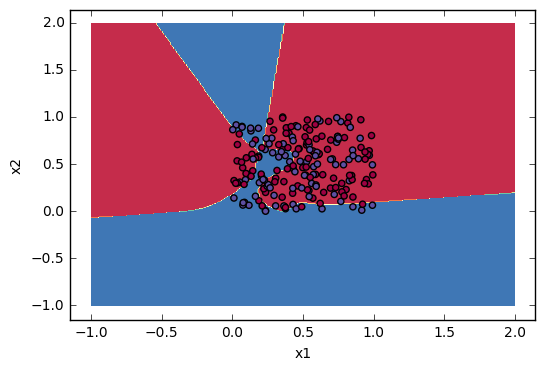

In [20]:
nn = MyNN.MyNN(2)
nn.add(5, 'Tanh')
nn.add(1, 'Sigmoid')
nn.compile('Cross entropy')
nn.optimize(X, Y, lr=1, num_iterations=10000,report_cost=False, report_cost_freq=100)
plot_decision_boundary(lambda x: predict(nn, x.T), X, Y)
predictions = predict(nn, X)
print('Accuracy: %d' % float((np.dot(Y, predictions.T) + np.dot(1-Y, 1-predictions.T))/float(Y.size)*100) + '%')